<a href="https://colab.research.google.com/github/chernandezrojas1991/predicciones-de-ventas-de-alimentos/blob/main/predicciones_de_ventas_de_alimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
filename = "/content/drive/MyDrive/Coding Dojo/Semana 2/sales_predictions_2023.csv"
sales_prediction_df = pd.read_csv(filename)
sales_prediction_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Convert to lowercase column names

In [18]:
sales_prediction_df.columns = sales_prediction_df.columns.str.lower()
sales_prediction_df.columns

Index(['item_identifier', 'item_weight', 'item_fat_content', 'item_visibility',
       'item_type', 'item_mrp', 'outlet_identifier',
       'outlet_establishment_year', 'outlet_size', 'outlet_location_type',
       'outlet_type', 'item_outlet_sales'],
      dtype='object')

1) ¿Cuántas filas y columnas hay?

In [19]:
sales_prediction_df.shape

(8523, 12)

El dataframe tiene 8523 filas (observaciones) y 12 columnas.

2) ¿Cuáles son los tipos de datos de cada variable?

In [20]:
sales_prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_identifier            8523 non-null   object 
 1   item_weight                7060 non-null   float64
 2   item_fat_content           8523 non-null   object 
 3   item_visibility            8523 non-null   float64
 4   item_type                  8523 non-null   object 
 5   item_mrp                   8523 non-null   float64
 6   outlet_identifier          8523 non-null   object 
 7   outlet_establishment_year  8523 non-null   int64  
 8   outlet_size                6113 non-null   object 
 9   outlet_location_type       8523 non-null   object 
 10  outlet_type                8523 non-null   object 
 11  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


El dataframe está compuesto de columnas de distinto tipo, las cuales se detallan a continuación:


*   object: item_identifier, item_fat_content, item_type, outlet_identifier, outlet_size, outlet_location_type, outlet_type.
*   float64: item_weight, item_visibility, item_mrp, item_outlet_sales.
*   int64: outlet_establishment_year.



3) ¿Hay duplicados? Si es el caso, elimínelos.

In [21]:
# Count the duplicates
sales_prediction_df.duplicated().sum()

0

No hay datos duplicados. Por lo tanto, no se hará código para eliminar duplicados.

4) Identifique los valores faltantes.

In [22]:
sales_prediction_df.isna().sum()

item_identifier                 0
item_weight                  1463
item_fat_content                0
item_visibility                 0
item_type                       0
item_mrp                        0
outlet_identifier               0
outlet_establishment_year       0
outlet_size                  2410
outlet_location_type            0
outlet_type                     0
item_outlet_sales               0
dtype: int64

La columna item_weight tiene 1463 datos faltantes, mientras que outlet_size tiene 2410.

5) Decida qué hacer con los valores faltantes y cómo hacerlo. (Esto requiere de su criterio, así que explique cada elección).

Dado que el porcentaje de datos faltantes excede el 2% del total de datos, no es recomendable eliminar las observaciones con dichos datos faltantes. Tampoco es buena opción eliminar las columnas, ya que item_weight y outlet_size están relacionadas directamente con lo que podría ser la predicción de ventas de alimentos, por lo cual se descarta esta posibilidad de tratamiento de valores faltantes.

La opción más apropiada para rellenar item_weight, a criterio del científico de datos, es rellenar estos datos faltantes con el promedio de valores de la columna en cuestión. Esta decisión se apoya en que el valor promedio se acerca al valor correcto. Y para la columna outlet_size se determina que, al ser una variable categórica (discreta), es rellenar con una nueva categoría llamada 'Missing'.

In [23]:
average_item_weight = sales_prediction_df['item_weight'].median()
sales_prediction_df['item_weight'].fillna(average_item_weight, inplace=True)
sales_prediction_df['outlet_size'].fillna('Missing', inplace=True)

6) Confirme que no hay valores faltantes después de tratarlos.

In [24]:
sales_prediction_df.isna().sum()

item_identifier              0
item_weight                  0
item_fat_content             0
item_visibility              0
item_type                    0
item_mrp                     0
outlet_identifier            0
outlet_establishment_year    0
outlet_size                  0
outlet_location_type         0
outlet_type                  0
item_outlet_sales            0
dtype: int64

7) Encuentre y arregle cualquier categoría inconsistente en los datos (ejemplo: arreglar los datos gato, Gato y Gatos de manera que sean consistentes)

In [25]:
sales_prediction_df.head()

,item_identifier,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Fix names to get only 'Low Fat' and 'Regular' to item_fat_content column.

In [26]:
sales_prediction_df['item_fat_content'] = sales_prediction_df['item_fat_content'].replace('LF', 'Low Fat')
sales_prediction_df['item_fat_content'] = sales_prediction_df['item_fat_content'].replace('reg', 'Regular')
sales_prediction_df['item_fat_content'] = sales_prediction_df['item_fat_content'].replace('low fat', 'Low Fat')
sales_prediction_df['item_fat_content'].value_counts()

item_fat_content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

8) Para cualquier columna numérica, obtenga las estadísticas resumidas de cada una (mínimo, máximo y media)

In [27]:
sales_prediction_df['item_weight'].describe()

count    8523.00000
mean       12.81342
std         4.22724
min         4.55500
25%         9.31000
50%        12.60000
75%        16.00000
max        21.35000
Name: item_weight, dtype: float64

Se elige la columna 'item weight'. Usar la función describe() permite obtener estadísticas básicas de la columna en cuestión. Se visualiza el valor mínimo 4.55, valor máximo 21.35 y la media 12.81. Es claro ver que da a conocer otras estadísticas resumidas que pueden ser muy valiosas a la hora de tratar con ellas.

# Análisis Estadístico

Para tener mayor entendimiento del contexto de este proyecto, se lista a continuación las descripciones de las características de este conjunto de datos.


*   **item_weight**: Peso del producto. Para efectos de mayor entendimiento, se asumirá que los pesos de productos (item_weight) está medido en kilogramos (kg).
*   **item_visibility**: Porcentaje de área total de exposición de todos los productos para una tienda asignada al producto concreto.
*   **item_mrp**: Precio máximo de venta al público (precio de catálogo) del producto.
*   **outlet_stablishment_year**: Año en que se estableció la tienda.
*   **item_outlet_sales**: Ventas del producto en una tienda particular. Esta la variable objetivo a predecir.



1) Histograma para ver las distribuciones de las diversas características en el conjunto de datos.

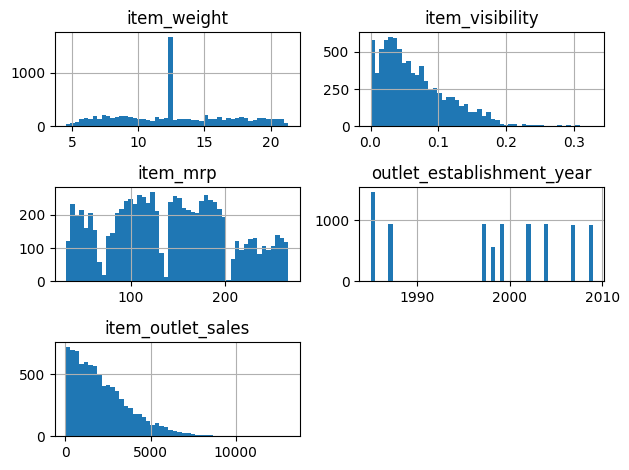

In [41]:
sales_prediction_df.hist(bins = 50)
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')
plt.tight_layout()
plt.show()

Se analizará los histogramas en orden:
1. **item_weight:** El peso de los items (o productos) va desde 5 a 20, según su unidad de medida. En el histograma es claro observar que existe una frecuencia que sobrepasa las 1000 unidades para aquellos productos que en promedio están entre los 10 y 15 kilogramos. El resto de los productos no presenta grandes variaciones y se mantiene constante con una frecuencia aproximada de 200 y 300.

2. **item_visibility**: El porcentaje de exposición del producto presenta un pick entre el 0.0 y el 5% con una frencuencia de aparición de 1000. Esto indica que para ciertos productos, el área de visibilidad o exposición en tienda del mismo ocupa casi un 5%, mientras que otros productos que tienen una visibilidad mayor casi al 10% tienen una frecuencia menor y va descendiendo a medida que crece el porcentaje de visibilidad. En otras palabras, sin efectuar ningún cálculo previo usando la función corr(), se puede inferir que existe una correlación negativa, es decir, a menor visibilidad de un producto es mayor la frecuencia (cantidad de veces que se dió lugar a la visibilidad de éste).

3. **item_mrp**: El precio máximo de los productos es variable para este conjunto de datos. Pero sí se puede observar que los productos cuyo valor está dentro del rango 50 a 200 (según sea su moneda). Además, cuyos valores de 200 en adelante se mantienen constantes con una frecuencia de registro (o aparición) de 200 o cercano a 200.

4. **outlet_establishment_year**: Hubo un pick de instalación de tiendas en los años 90', mientras que hubo una baja muy significativa de instalaciones entre fines de los 90' y comienzos de los 2000'. Luego, hubo un alza significativa de instalación de tiendas durante los años 2000' a 2010'.

5. **item_outlet_sales**: Se infiere que hubo un pick en la venta de productos superando las 500 unidades por tienda, pero esta cifra va disminuyendo a medida que se iban instalaron más tiendas que vendían el mismo producto, la venta por tienda disminuyó.

2) Boxplot para ver resúmenes estadísticos de diversas características del conjunto de datos.
Mapa de calor de correlación entre las características.